In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ✅ Step 1: Load data (correct relative path from notebooks/)
df = pd.read_csv('../data/traffic_data.csv')

# ✅ Step 2: Convert time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.weekday

# ✅ Step 3: Encode categoricals
for col in ['location', 'weather', 'road_type']:
    le = LabelEncoder()
    df[col + '_enc'] = le.fit_transform(df[col])

# ✅ Step 4: Drop original columns
df_clean = df.drop(columns=['location', 'weather', 'road_type'])

# ✅ Step 5: Save cleaned CSV (correct path)
df_clean.to_csv('../data/traffic_cleaned.csv', index=False)

print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df_clean = pd.read_csv('../data/traffic_cleaned.csv')
df = pd.read_csv('../data/traffic_data.csv')  # Original file for category columns


C:\Users\pujaa\AppData\Local\Temp\ipykernel_69900\809727424.py:7: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pujaa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


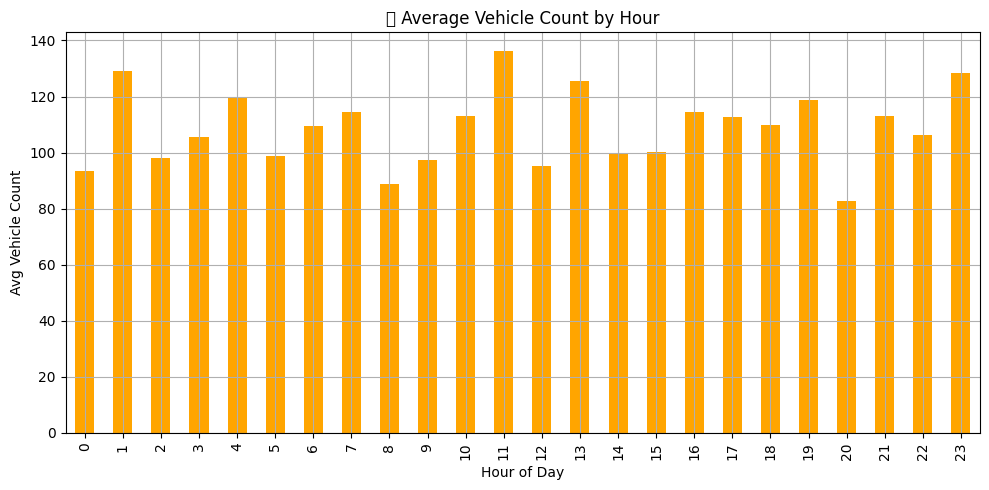

In [5]:
plt.figure(figsize=(10,5))
df_clean.groupby('hour')['vehicle_count'].mean().plot(kind='bar', color='orange')
plt.title("⏰ Average Vehicle Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Vehicle Count")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\pujaa\AppData\Local\Temp\ipykernel_69900\2339691301.py:8: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pujaa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


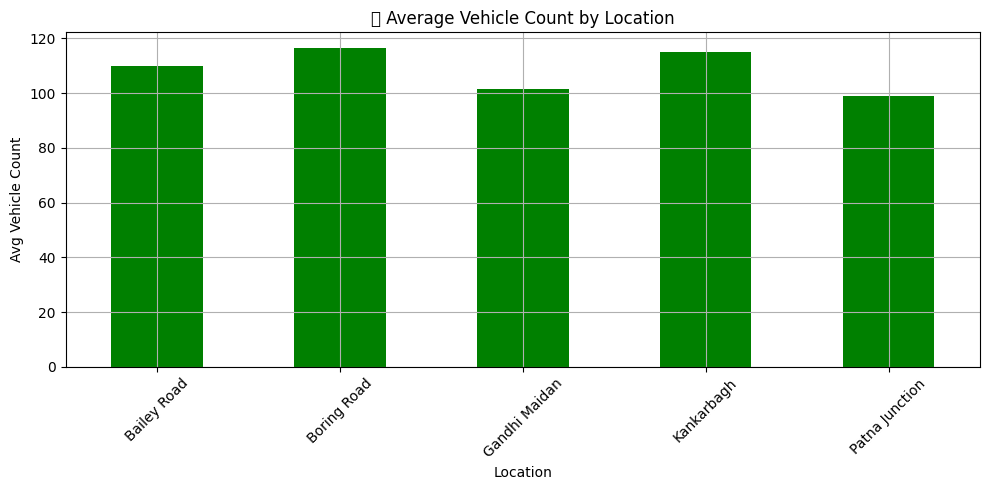

In [6]:
plt.figure(figsize=(10,5))
df.groupby('location')['vehicle_count'].mean().plot(kind='bar', color='green')
plt.title("📍 Average Vehicle Count by Location")
plt.xlabel("Location")
plt.ylabel("Avg Vehicle Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\pujaa\AppData\Local\Temp\ipykernel_69900\3609398102.py:7: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pujaa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


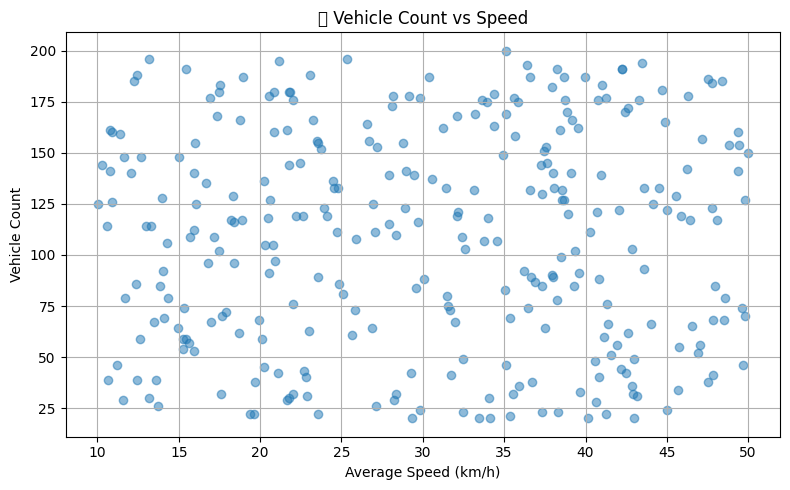

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean['avg_speed'], df_clean['vehicle_count'], alpha=0.5)
plt.title("🚗 Vehicle Count vs Speed")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Vehicle Count")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\pujaa\AppData\Local\Temp\ipykernel_69900\2583400793.py:6: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pujaa\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


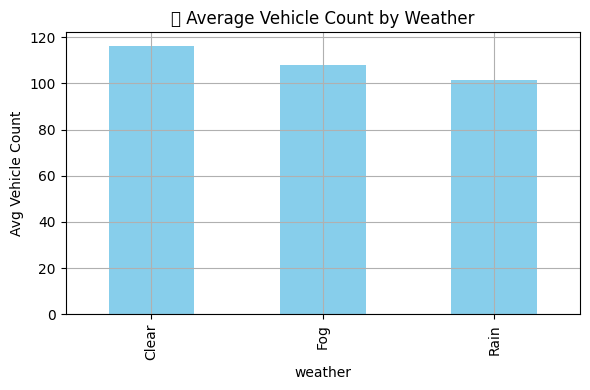

In [8]:
plt.figure(figsize=(6,4))
df.groupby('weather')['vehicle_count'].mean().plot(kind='bar', color='skyblue')
plt.title("🌦️ Average Vehicle Count by Weather")
plt.ylabel("Avg Vehicle Count")
plt.grid(True)
plt.tight_layout()
plt.show()
